## Cross Validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
URL='http://facweb1.redlands.edu/fac/Tamara_Veenstra/ML/fruits.csv'
df = pd.read_csv(URL,index_col=0)
df.head()

,fruit_name,fruit_subtype,height,mass,width,color_score
0,apple,granny_smith,7.3,192,8.4,0.55
1,apple,granny_smith,6.8,180,8.0,0.59
2,apple,granny_smith,7.2,176,7.4,0.60
3,mandarin,mandarin,4.7,86,6.2,0.80
4,mandarin,mandarin,4.6,84,6.0,0.79


In [2]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['fruit_name'])
print(list(le.classes_))
df['fruit_label']=le.transform(df['fruit_name'])
df.head(5)

['apple', 'lemon', 'mandarin', 'orange']


,fruit_name,fruit_subtype,height,mass,width,color_score,fruit_label
0,apple,granny_smith,7.3,192,8.4,0.55,0
1,apple,granny_smith,6.8,180,8.0,0.59,0
2,apple,granny_smith,7.2,176,7.4,0.60,0
3,mandarin,mandarin,4.7,86,6.2,0.80,2
4,mandarin,mandarin,4.6,84,6.0,0.79,2


In [3]:
X = df[['height', 'width']]
y = df['fruit_label']

In [4]:
#cross_val_score?

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

cvnum=3  ## note: cvnum=6
clf = KNeighborsClassifier(n_neighbors = 3)
cv_scores = cross_val_score(clf, X, y, cv=cvnum)

print('Cross-validation scores ({}-fold): {}'.format(cvnum,cv_scores))
print('Mean cross-validation score ({}-fold): {:.3f}'
     .format(cvnum,np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.77272727 0.78947368 0.77777778]
Mean cross-validation score (3-fold): 0.780


In [6]:
## What is size of training and test sets?
print("test set",round(len(df)/cvnum))
print("test set",round((cvnum-1)*len(df)/cvnum))

test set 20
test set 39


## Model Optimization/Parameter Tuning: Validation Curve and Grid Search

### Varying One Parameter: Validation Curve

In [7]:
from sklearn.model_selection import validation_curve
param_range = range(1,8,2)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X, y,
                                            param_name='n_neighbors',
                                            param_range=param_range, cv=cvnum)

In [8]:
validation_curve?

In [9]:
print(train_scores)
print("average across folds",np.mean(train_scores, axis=1))
print("standard deviation",np.std(train_scores, axis=1))
## training scores for each fold [columns], for each k [rows]
## row 1 is 1 nearest neighbor, etc

[[1.         1.         0.97560976]
 [0.89189189 0.875      0.87804878]
 [0.86486486 0.825      0.82926829]
 [0.81081081 0.725      0.7804878 ]]
average across folds [0.99186992 0.88164689 0.83971105 0.77209954]
standard deviation [0.01149767 0.00735046 0.01787158 0.0355307 ]


In [10]:
print(test_scores)
print("average across folds",np.mean(test_scores, axis=1))
print("standard deviation",np.std(test_scores, axis=1))

[[0.81818182 0.68421053 0.66666667]
 [0.77272727 0.78947368 0.77777778]
 [0.77272727 0.73684211 0.83333333]
 [0.77272727 0.63157895 0.72222222]]
average across folds [0.72301967 0.77999291 0.78096757 0.70884281]
standard deviation [0.0676699  0.00701383 0.03982098 0.05839503]


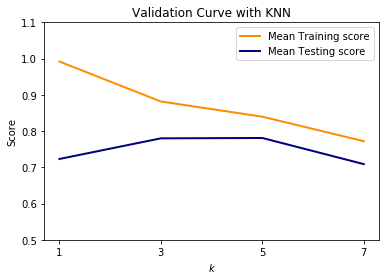

In [11]:
import matplotlib.pyplot as plt
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title('Validation Curve with KNN')
plt.xlabel('$k$')
plt.ylabel('Score')
plt.xticks(param_range)
plt.ylim(0.5, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label='Mean Training score',color='darkorange', lw=lw)
plt.plot(param_range, test_scores_mean, label='Mean Testing score',color='navy', lw=lw)
plt.legend(loc='best')
plt.show()

## Varying Multiple Parameters: Grid Search

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
grid_values = {'n_neighbors': param_range}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(KNeighborsClassifier(), param_grid = grid_values, cv=3, iid=False)
grid_clf_acc.fit(X, y)
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): {:.3f}'.format(grid_clf_acc.best_score_))

Grid best parameter (max. accuracy):  {'n_neighbors': 5}
Grid best score (accuracy): 0.781


In [14]:
#GridSearchCV?

In [15]:
grid_clf_acc.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
k_range = range(1,30,2)
p_range=[1,2,3,4,5]
grid_values = {'n_neighbors': k_range,'p':p_range}

In [17]:
grid_clf_acc = GridSearchCV(KNeighborsClassifier(), param_grid = grid_values, cv=3, iid=False)
grid_clf_acc.fit(X, y)
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): {:.3f}'.format(grid_clf_acc.best_score_))

Grid best parameter (max. accuracy):  {'n_neighbors': 5, 'p': 3}
Grid best score (accuracy): 0.796


In [18]:
from sklearn.model_selection import RandomizedSearchCV

In [19]:
#RandomizedSearchCV?

In [20]:
grid_rand=RandomizedSearchCV(KNeighborsClassifier(),param_distributions=grid_values, cv=3, iid=False)
grid_rand.fit(X,y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid=False, n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': range(1, 30, 2),
                                        'p': [1, 2, 3, 4, 5]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [21]:
grid_rand.best_params_

{'p': 5, 'n_neighbors': 5}

In [22]:
grid_rand.best_score_

0.7961190855927698

## Model Evaluation: ROC curves and precision/recall curves

In [23]:
from sklearn.datasets import load_digits
#from sklearn.preprocessing import train

In [24]:
from sklearn.datasets import load_digits
dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [25]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [26]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9088888888888889

In [28]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9955555555555555

In [31]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [32]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[369  38]
 [ 37   6]]


In [33]:
knn_predicted = knn.predict(X_test)
confusion = confusion_matrix(y_test, knn_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[406   1]
 [  1  42]]


In [34]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [35]:
#from sklearn.linear_model import LogisticRegression

#lr = LogisticRegression().fit(X_train, y_train)
#lr_predicted = lr.predict(X_test)
#confusion = confusion_matrix(y_test, lr_predicted)

#print('Logistic regression classifier (default settings)\n', confusion)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, svm_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, svm_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, svm_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, svm_predicted)))

Accuracy: 0.98
Precision: 0.88
Recall: 0.88
F1: 0.88


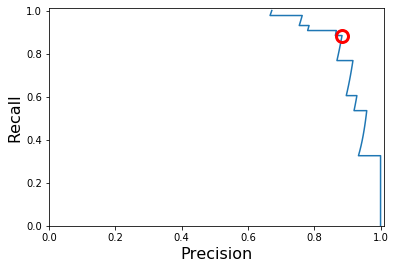

In [37]:
from sklearn.metrics import precision_recall_curve

y_scores_svm = svm.fit(X_train, y_train).decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_svm)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
#plt.axes().set_aspect('equal')
plt.show()

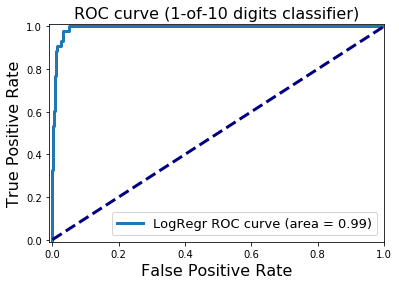

In [38]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_svm = svm.fit(X_train, y_train).decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_svm, tpr_svm, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_svm))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
#plt.axes().set_aspect('equal')
plt.show()